In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


In [76]:
df=pd.read_csv('Abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [77]:
df.shape

(4177, 9)

In [78]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [80]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [81]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [82]:
df.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

# DATA VISUALIZATIONS

<AxesSubplot:>

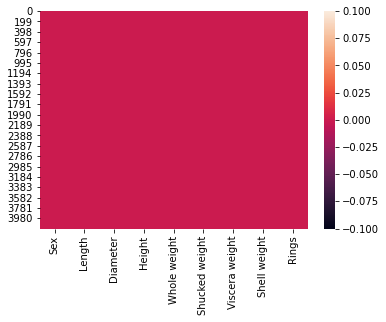

In [83]:
sns.heatmap(df.isnull())

In [84]:
dfcor=df.corr()
dfcor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

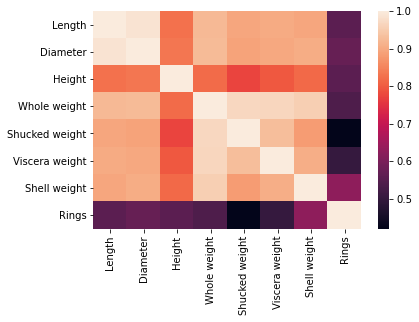

In [85]:
sns.heatmap(dfcor)

In [86]:
sns.color_palatte?

Object `sns.color_palatte` not found.


In [87]:
sns.heatmap?

<AxesSubplot:>

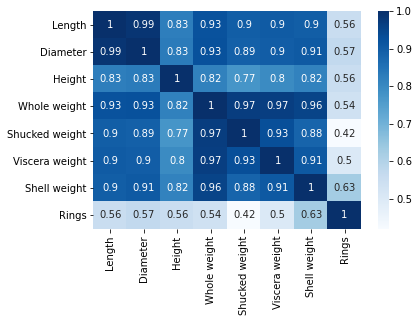

In [88]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [89]:
sns.heatmap?

<AxesSubplot:>

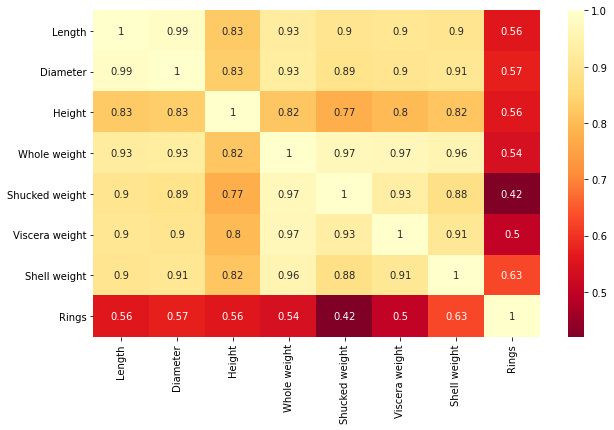

In [90]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [91]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<AxesSubplot:>

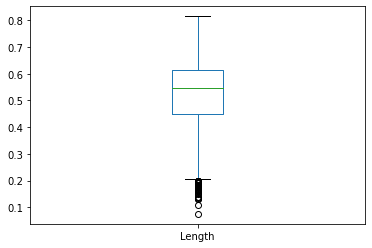

In [92]:
df['Length'].plot.box()

<AxesSubplot:>

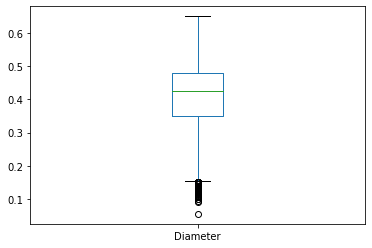

In [93]:
df['Diameter'].plot.box()

<AxesSubplot:>

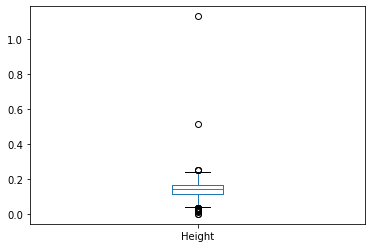

In [94]:
df['Height'].plot.box()

<AxesSubplot:>

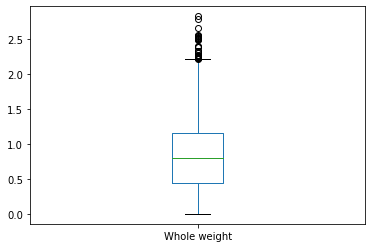

In [95]:
df['Whole weight'].plot.box()

<AxesSubplot:>

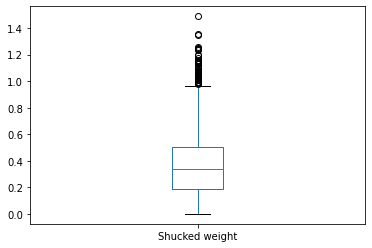

In [96]:
df['Shucked weight'].plot.box()

<AxesSubplot:>

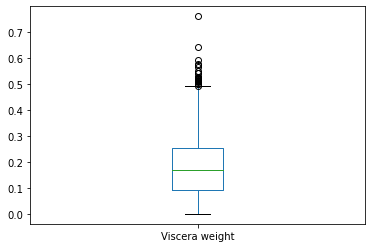

In [97]:
df['Viscera weight'].plot.box()

<AxesSubplot:>

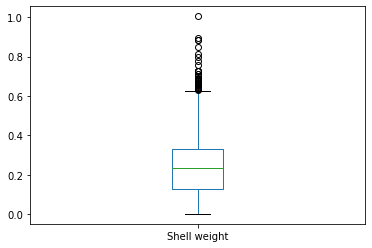

In [98]:
df['Shell weight'].plot.box()

<AxesSubplot:>

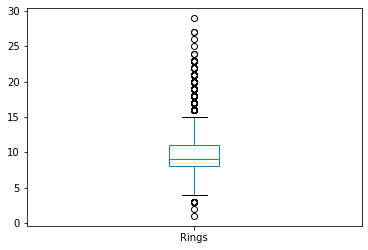

In [99]:
df['Rings'].plot.box()

In [100]:
df.shape

(4177, 9)

In [101]:
collist=df.columns.values
ncol=9
nrows=10

In [102]:
plt.subplot?

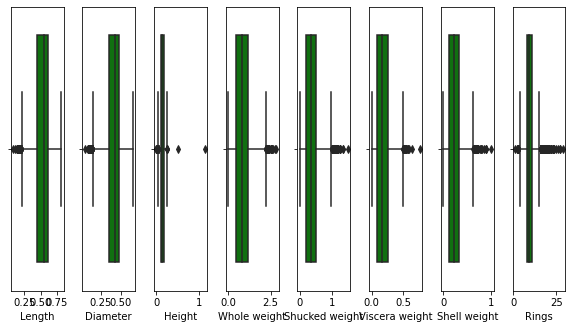

In [103]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

<AxesSubplot:xlabel='Length', ylabel='Density'>

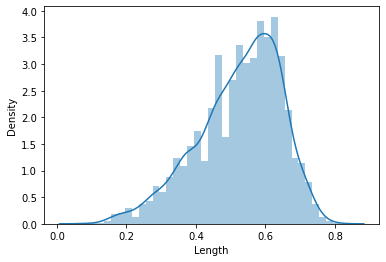

In [104]:
sns.distplot(df['Length'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

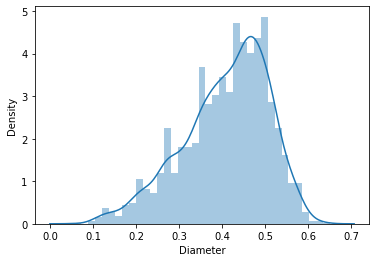

In [105]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

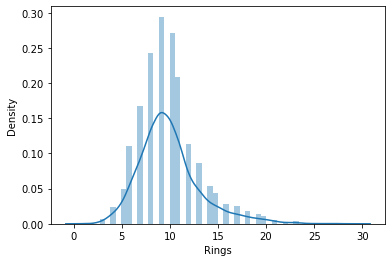

In [106]:
sns.distplot(df['Rings'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

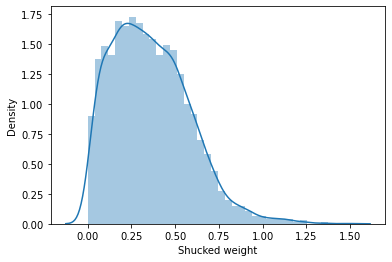

In [107]:
sns.distplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

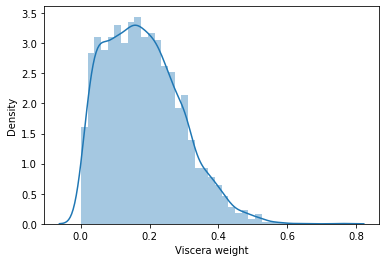

In [108]:
sns.distplot(df['Viscera weight'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

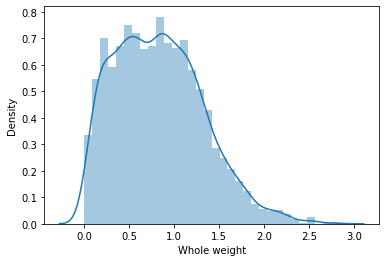

In [109]:
sns.distplot(df['Whole weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

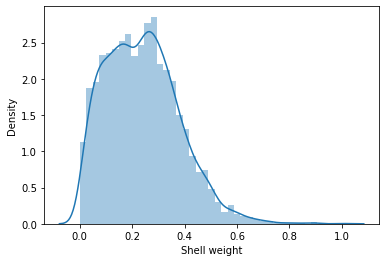

In [110]:
sns.distplot(df['Shell weight'])

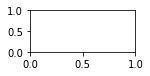

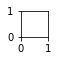

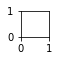

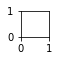

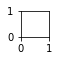

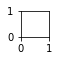

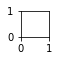

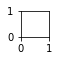

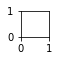

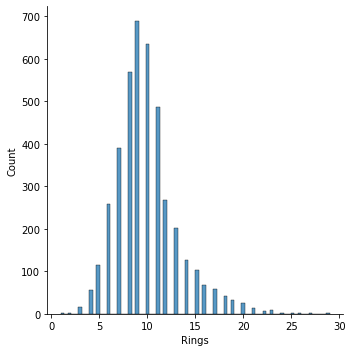

In [111]:


plt.figure(figsize=(20,9))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.displot(df[collist[i]])


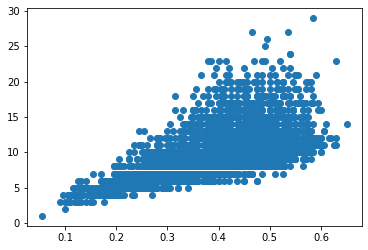

In [112]:
plt.scatter(df['Diameter'],df['Rings'])

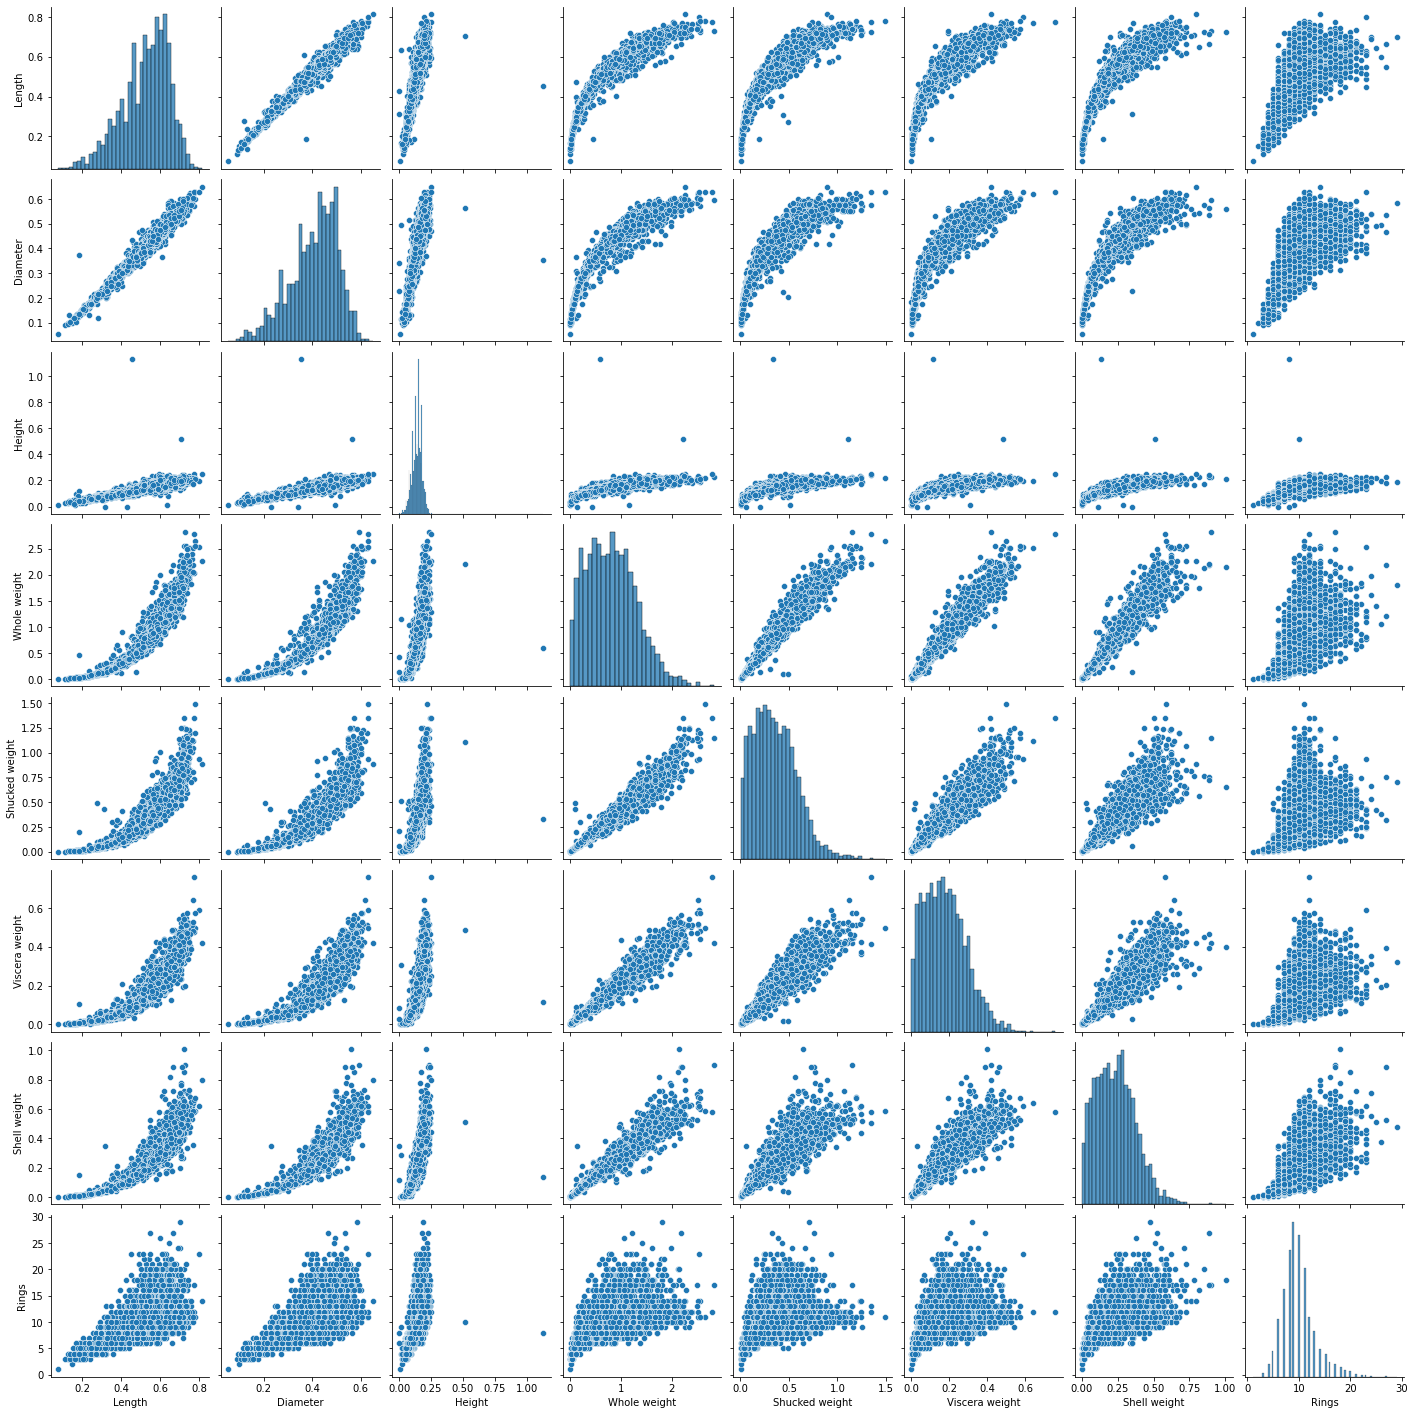

In [113]:
sns.pairplot(df)

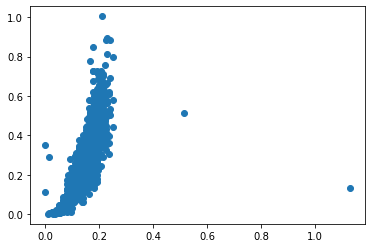

In [114]:



# <matplotlib.collections.PathCollection at 0x11a149a0>

plt.scatter(df['Height'],df['Shell weight'])
plt.show()

In [115]:
df.drop('Viscera weight',axis=1,inplace=True)

In [116]:
df.drop('Sex',axis=1,inplace=True)

In [117]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.055,7


In [118]:
df.shape

(4177, 7)

In [119]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.60768536, 0.63821689,
        1.57154357],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.17090984, 1.21298732,
        0.91001299],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.4634999 , 0.20713907,
        0.28962385],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.74855917, 0.49695471,
        0.28962385],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.77334105, 0.41073914,
        0.02057072],
       [1.54905203, 1.48263359, 1.32665906, ..., 2.64099341, 1.84048058,
        0.64095986]])

In [120]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  181,  232,  236,  236,  236,  237,  237,  238,
        238,  239,  270,  275,  277,  278,  294,  310,  313,  314,  334,
        351,  355,  358,  358,  362,  375,  416,  417,  428,  431,  433,
        469,  478,  480,  501,  526,  526,  530,  572,  628,  673,  674,
        675,  678,  694,  696,  696,  719,  719,  720,  720,  744,  754,
        756,  811,  891,  891,  891, 1051, 1051, 1052, 1193, 1197, 1199,
       1202, 1206, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418,
       1426, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756, 1761, 1762,
       1762, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2335, 2344, 2358, 2368, 2381, 2436,
       2459, 2471, 2544, 2623, 2624, 2624, 2625, 2710, 2810, 2811, 2811,
       2862, 2863, 2863, 3007, 3008, 3140, 3148, 3

In [121]:
z[417][5]

1.5171722166257202

In [122]:
z[100][5]

1.1770641656539398

In [123]:
df_new=df[z<3].all(axis=1)

In [124]:
type(df_new)

pandas.core.series.Series

In [125]:
df.keys()

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Shell weight', 'Rings'],
      dtype='object')

In [126]:
dfdata=pd.DataFrame(df)


In [127]:
dfdata

,Length,Diameter,Height,Whole weight,Shucked weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0550,7
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2960,10


In [128]:
df=pd.DataFrame(data=dfdata)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0550,7
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2960,10


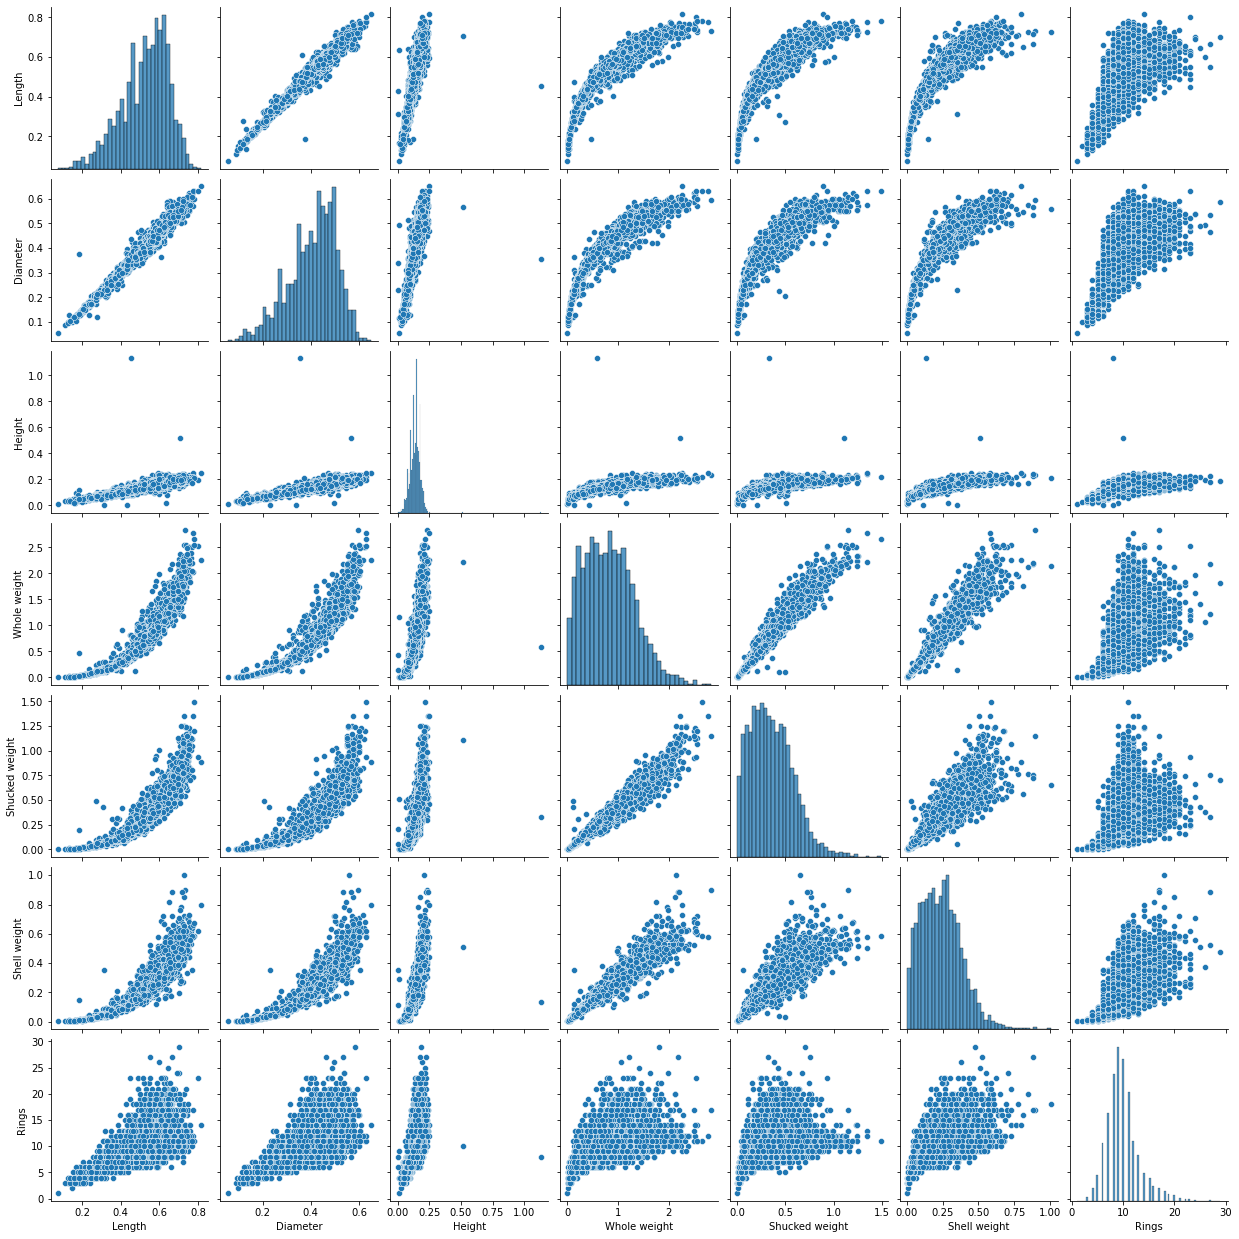

In [129]:
sns.pairplot(df)

# please call the functions so that you can visualize them in a better manner. the output of this code return the numpy array.

In [130]:
x = dfdata.iloc[:,:-1]
x

,Length,Diameter,Height,Whole weight,Shucked weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0550
...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2960


In [131]:
y = dfdata.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [132]:
x= dfdata.iloc[:,:-1]
y = dfdata.iloc[:,-1]


In [133]:
x.shape

(4177, 6)

In [134]:
y.shape

(4177,)

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [136]:
x_train.shape

(3258, 6)

In [137]:
x_test.shape

(919, 6)

In [138]:
y_train.shape

(3258,)

In [139]:
y_test.shape

(919,)

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [141]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.264417845484222
[[ 0  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  3  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6 15  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 10 38  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7 30 27  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 25 52 46  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 14 44 67 25  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 14 19 47 48 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3 14 34 27 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 13  9 15 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1 10 10 19  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4 10 16  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  4  8  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  2  8  4  0  0  0  0  0  0

In [142]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.20783460282916214
[[ 1  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  5  8 10  4  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  7 13 13 13  6  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1 11 17 15 11  6  3  2  3  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11 25 38 27 12 10  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 14 33 38 31 19  8  2  1  2  2  1  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  1  4 16 28 33 28 13  5  5  3  1  0  1  2  2  0  0  0  1  0  0]
 [ 0  0  1  0  2 12 18 22 29  6  6  5  1  2  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  8 13 12  8  2  2  1  5  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  2  6  4  6  5  0  4  3  3  7  0  1  1  0  0  1  0  0  0]
 [ 0  0  0  0  2  2  4  5  5  3  4  4  0  2  1  1  1  2  0  0  0  0  0  0]
 [ 0  0  0  0  2  1  7  3  2  4  0  0  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 0 

In [143]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.23721436343852012
[[ 1  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  8  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  7  9  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  6 20 19  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 14 22 22  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11 30 44 24 15  5  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 15 41 52 22 11  8  2  0  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 20 46 35 19  9  1  1  0  2  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  3 13 26 30 21  5  3  3  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 10 18  5  9  4  2  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  2  6 12  5  6  3  4  2  1  1  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  8 11  6  3  1  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  2  3  2  7  3  2  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  3  6  2  2  1  1  0  0 

In [144]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.2611534276387378
[[ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0 43  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0 39 24  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 29 50 47  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 14 47 71 22  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16 17 60 44  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 10 45 30 15  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 12 17 13  6  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 10  9 22  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4 12 17  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  4  9  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  2  9  1  0  1  0  0  1  

In [145]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.2611534276387378
[[ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0 43  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0 39 24  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 29 50 47  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 14 47 71 22  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16 17 60 44  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 10 45 30 15  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 12 17 13  6  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 10  9 22  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4 12 17  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  4  9  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  2  9  1  0  1  0  0  1  

In [146]:
svmkernel('rbf')

In [147]:
svmkernel('poly')

In [148]:
df1=pd.DataFrame(predsvc)
df1.to_csv('_prediction3.csv')